In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, FunctionTransformer, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [4]:
df = pd.read_csv('mirai3.csv', header=None)
labels = [1] * 71000 + [-1] * 29000
df['label'] = labels

X = df.drop('label', axis = 1)
y = df['label']

df

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,label
0,1.89742,68.1526,46.927100,2.30082,68.6038,46.126200,4.74452,71.1236,38.470500,36.0737,...,-9.074680e-29,-2.880320e-17,143.15200,74.0,0.000003,104.652,6.621220e-12,2.175260e-27,6.392140e-16,1
1,1.75007,69.4285,118.530000,3.06442,74.7885,106.647000,11.08620,78.8105,59.996500,110.2570,...,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000e+00,0.000000e+00,1
2,2.74967,65.9995,95.995400,4.06400,71.1496,120.978000,12.08570,77.2540,81.886900,111.2570,...,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000e+00,0.000000e+00,1
3,1.20593,89.8507,80.829300,1.81715,95.6911,137.610000,6.57048,100.4730,159.338000,78.1247,...,0.000000e+00,0.000000e+00,1.00000,86.0,0.000000,86.000,0.000000e+00,0.000000e+00,0.000000e+00,1
4,1.02825,86.0000,0.000003,1.13366,86.0004,0.000808,2.07755,86.0922,0.175812,12.4676,...,0.000000e+00,0.000000e+00,4.93732,86.0,0.000002,86.000,2.728480e-12,0.000000e+00,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.00603,60.1305,2.854850,1.11986,62.2229,43.963200,5.61876,73.8553,112.847000,107.6470,...,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000e+00,0.000000e+00,-1
99996,2.00582,60.0655,1.435830,2.11972,61.1742,24.454500,6.61853,71.7619,120.420000,108.6470,...,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000e+00,0.000000e+00,-1
99997,1.40708,92.7404,133.860000,1.90395,95.1054,213.901000,6.04193,95.6510,415.480000,72.9923,...,0.000000e+00,0.000000e+00,1.00000,86.0,0.000000,86.000,0.000000e+00,0.000000e+00,0.000000e+00,-1
99998,2.40571,89.9386,89.252800,2.90284,91.9687,158.937000,7.04075,94.2802,367.820000,73.9909,...,0.000000e+00,0.000000e+00,1.00000,86.0,0.000000,86.000,0.000000e+00,0.000000e+00,0.000000e+00,-1


lets run a cross-val of lightgbm

In [6]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

cv = StratifiedKFold()

def cross_val(X, y, model, cv):
    res = cross_validate(model, 
               X=X, 
               y=y, 
               cv=cv,
               scoring=('accuracy', 'f1_weighted', 'precision', 'recall'),
               )
    
    display(res)
    print("\n")
    for metric in ['test_accuracy', 'test_f1_weighted', 'test_precision', 'test_recall']:
        print(metric, res[metric].mean())

cross_val(X,y,model,cv)

[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29080
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384


[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29049
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29068
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [

{'fit_time': array([0.79039693, 0.8307817 , 0.82831883, 0.83339524, 0.73936963]),
 'score_time': array([0.0327003 , 0.02328944, 0.03369474, 0.02663016, 0.03283143]),
 'test_accuracy': array([0.9123 , 0.99505, 1.     , 0.99865, 0.43185]),
 'test_f1_weighted': array([0.90717024, 0.99506155, 1.        , 0.9986499 , 0.38295483]),
 'test_precision': array([0.89089196, 0.99978734, 1.        , 0.99894389, 1.        ]),
 'test_recall': array([0.99880282, 0.99323944, 1.        , 0.99915493, 0.19978873])}



test_accuracy 0.8675700000000001
test_f1_weighted 0.8567673059016979
test_precision 0.9779246369024645
test_recall 0.8381971830985915


last_split isnt doing so well, lets see its indexes

In [10]:
validation_index = []
for fold, (train_index, val_index) in enumerate(cv.split(X, y)):
    if fold == 4:
        validation_index = val_index
validation_index


array([56800, 56801, 56802, ..., 99997, 99998, 99999])

<Axes: ylabel='Density'>

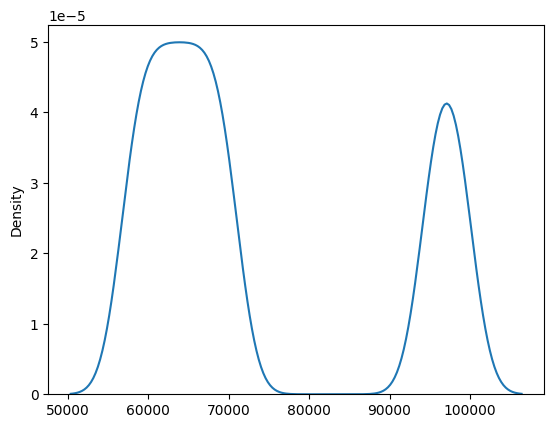

In [15]:
sns.kdeplot(validation_index)

In [21]:
preds = []
trues = []
for fold, (train_index, val_index) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    if fold == 4:  
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        trues = y_val
        res = pd.concat([y_val, pd.Series(preds, index=y_val.index, name='preds')], axis=1)
    
    

mispredicted = res[res['label'] != res['preds']].index
mispredicted


[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29068
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384


Index([57216, 57218, 57219, 57220, 57230, 57231, 57232, 57233, 57234, 57241,
       ...
       70990, 70991, 70992, 70993, 70994, 70995, 70996, 70997, 70998, 70999],
      dtype='int64', length=11363)

<Axes: ylabel='Density'>

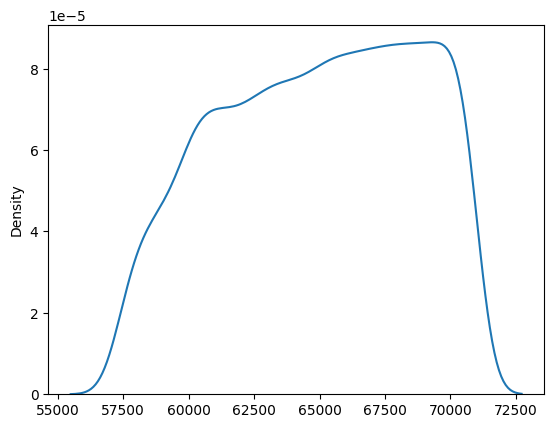

In [22]:
sns.kdeplot(mispredicted)

we see that the samples of the transition are being mispredicted, how can we fix this?

IndexError: index 27 is out of bounds for axis 0 with size 27

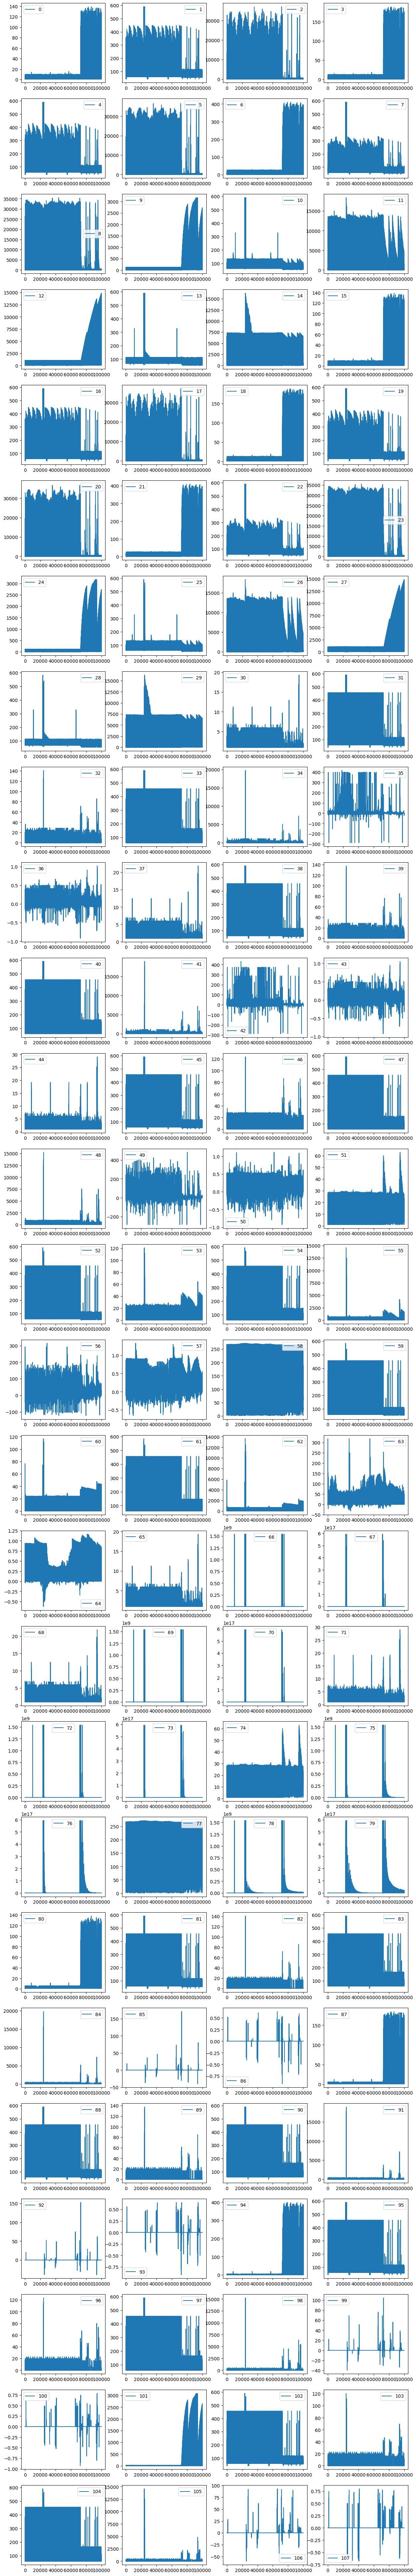

In [4]:
fig, ax = plt.subplots(27, 4, figsize=(15, 100))
for i, col in enumerate(df.columns):
    ax_ = ax[i//4][i%4]
    df[col].plot(ax=ax_)
    ax_.legend()

plt.tight_layout()
plt.show()

In [25]:
useless = [13, 14, 25, 28, 29, 32, 34, 35, 36, 39, 41, 42, 43, 44, 46, 48, 49, 50, 57, 58, 63, 64, 66, 67,
69, 70, 72, 73, 75, 76, 78, 79, 82, 84, 85, 86, 91, 92, 93, 99, 100, 106, 107,113,114]

len(useless)

useful = [feat for feat in X.columns if feat not in useless]


In [26]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

cv = StratifiedKFold()

def cross_val(X, y, model, cv):
    res = cross_validate(model, 
               X=X, 
               y=y, 
               cv=cv,
               scoring=('accuracy', 'f1_weighted', 'precision', 'recall'),
               )
    
    display(res)
    print("\n")
    for metric in ['test_accuracy', 'test_f1_weighted', 'test_precision', 'test_recall']:
        print(metric, res[metric].mean())

cross_val(X[useful],y,model,cv)

[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17605
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17574
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[Li

{'fit_time': array([0.49578881, 0.86170077, 0.54781604, 0.53753781, 0.48248482]),
 'score_time': array([0.02461147, 0.02532983, 0.02909374, 0.02647996, 0.02425313]),
 'test_accuracy': array([0.8639 , 0.924  , 0.98825, 0.96625, 0.9561 ]),
 'test_f1_weighted': array([0.8518839 , 0.92513238, 0.98818577, 0.96601149, 0.95637634]),
 'test_precision': array([0.84697703, 0.96803484, 0.98466023, 0.96750778, 0.97776503]),
 'test_recall': array([0.9865493 , 0.9234507 , 0.99901408, 0.98556338, 0.96      ])}



test_accuracy 0.9397
test_f1_weighted 0.9375179752370671
test_precision 0.9489889816335699
test_recall 0.9709154929577466


woow removing some of the features improves the score significantly!

lets try changing some of the useless ones to make the model better understand the transition

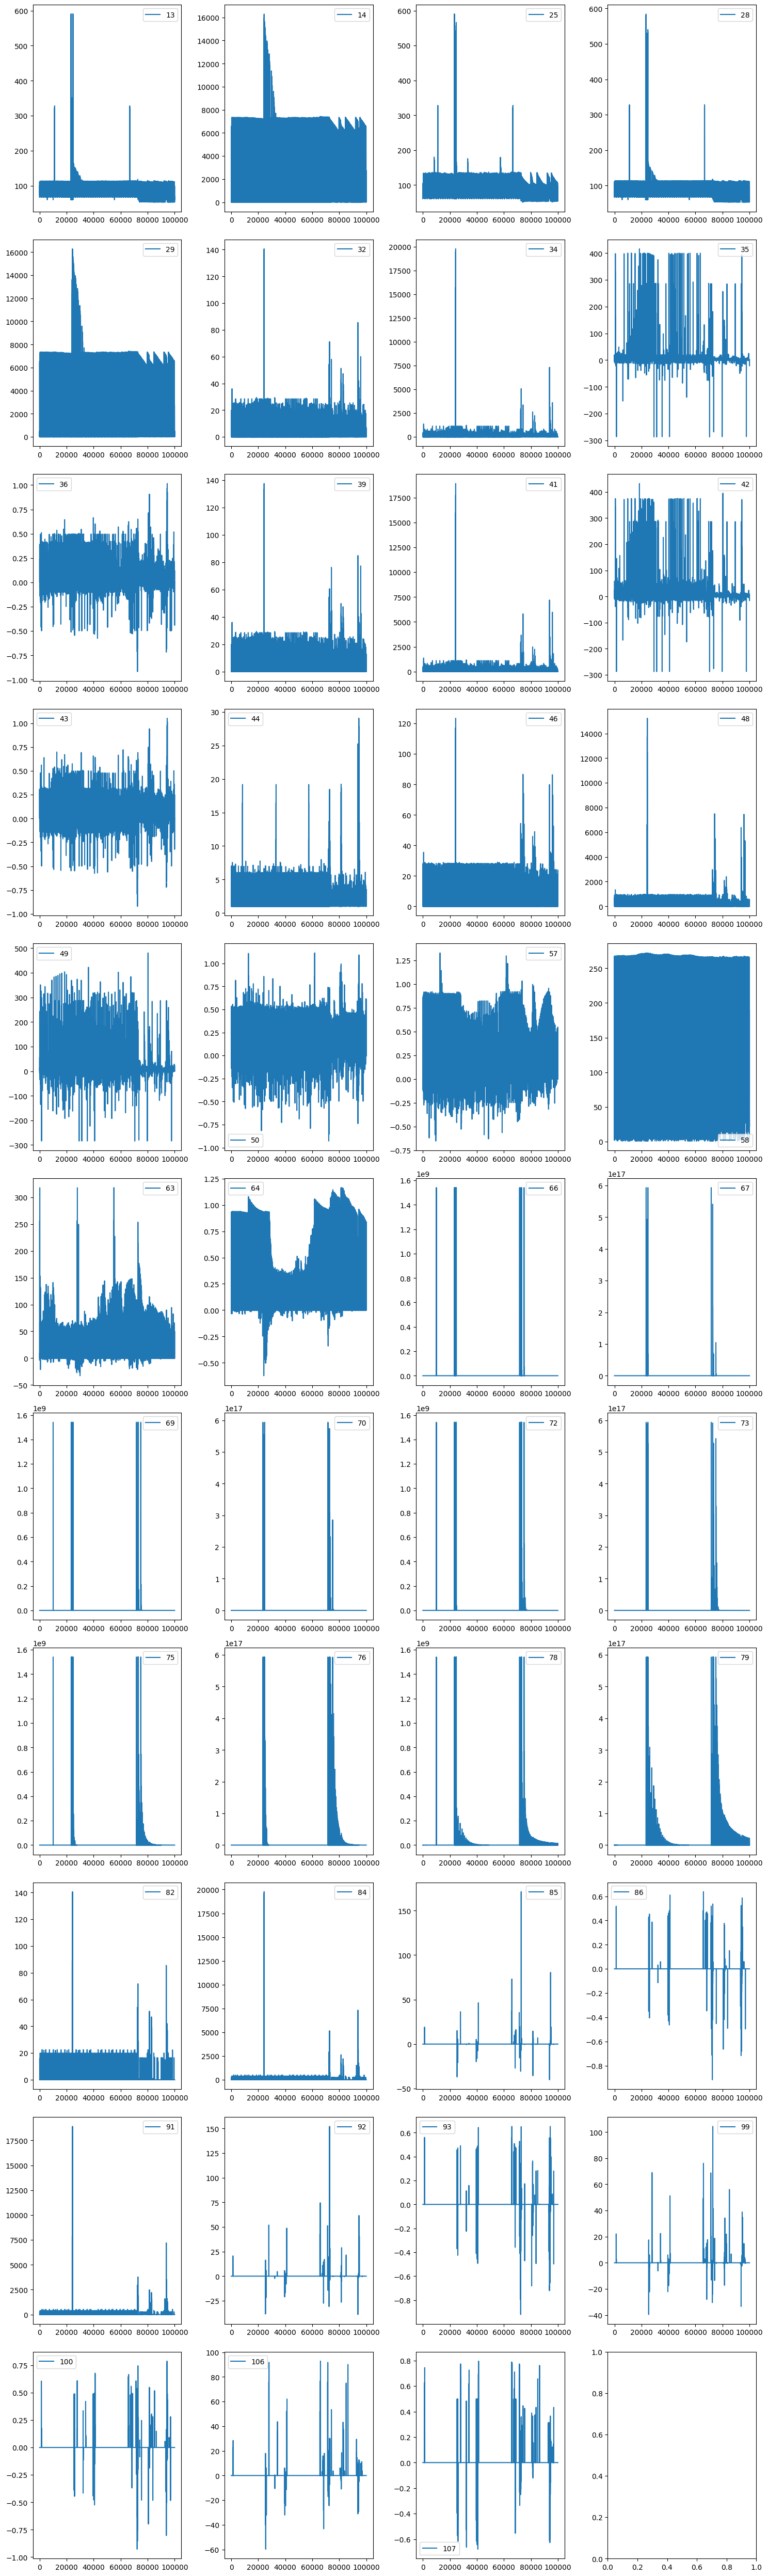

In [6]:
fig, ax = plt.subplots(11, 4, figsize=(15, 50))
for i, col in enumerate(useless):
    ax_ = ax[i//4][i%4]
    df[col].plot(ax=ax_)
    ax_.legend()

plt.tight_layout()
plt.show()

<Axes: >

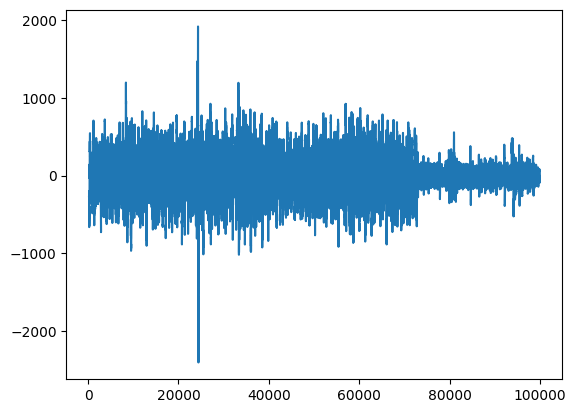

In [23]:
df[14].rolling(window=100).mean().diff(periods=100).plot()

In [27]:
X['14_aggr'] = X[14].rolling(window=100).mean().diff(periods=100).fillna(0)
X['25_aggr'] = X[25].rolling(window=100).std().diff(periods=100).fillna(0)
X['64_aggr'] = X[64].rolling(window = 100).std().diff()

X['57_aggr'] = X[57].rolling(window = 100).std().diff()
X['79_aggr'] = X[79].pct_change()

useful = [feat for feat in X.columns if feat not in useless]


In [38]:
X = X.drop('57_aggr', axis =1)
useful = [feat for feat in X.columns if feat not in useless]

In [28]:
useful

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 30,
 31,
 33,
 37,
 38,
 40,
 45,
 47,
 51,
 52,
 53,
 54,
 55,
 56,
 59,
 60,
 61,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 81,
 83,
 87,
 88,
 89,
 90,
 94,
 95,
 96,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 108,
 109,
 110,
 111,
 112,
 '14_aggr',
 '25_aggr',
 '64_aggr',
 '57_aggr',
 '79_aggr']

In [30]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

cv = StratifiedKFold()

def cross_val(X, y, model, cv):
    res = cross_validate(model, 
               X=X, 
               y=y, 
               cv=cv,
               scoring=('accuracy', 'f1_weighted', 'precision', 'recall'),
               )
    
    display(res)
    print("\n")
    for metric in ['test_accuracy', 'test_f1_weighted', 'test_precision', 'test_recall']:
        print(metric, res[metric].mean())

cross_val(X[useful],y,model,cv)

[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18880
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18849
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [In

{'fit_time': array([0.57159543, 0.56348419, 0.55244732, 0.5963099 , 0.58633971]),
 'score_time': array([0.03060222, 0.02795577, 0.02789211, 0.02962804, 0.02827621]),
 'test_accuracy': array([0.88225, 0.95525, 0.99465, 0.9748 , 0.96375]),
 'test_f1_weighted': array([0.87214316, 0.9554352 , 0.99464076, 0.97469301, 0.96411524]),
 'test_precision': array([0.85909174, 0.97406114, 0.99390201, 0.97681381, 0.98911071]),
 'test_recall': array([0.9978169 , 0.96260563, 0.99859155, 0.98795775, 0.95950704])}



test_accuracy 0.95414
test_f1_weighted 0.9522054716064197
test_precision 0.9585958822308001
test_recall 0.9812957746478872


In [27]:
X_test = X[useful]
X_test

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,14_aggr,25_aggr,64_aggr,57_aggr,79_aggr
0,1.89742,68.1526,46.927100,2.30082,68.6038,46.126200,4.74452,71.1236,38.470500,36.0737,...,143.15200,74.0,0.000003,104.652,6.621220e-12,0.000000,0.000000,NaN,NaN,NaN
1,1.75007,69.4285,118.530000,3.06442,74.7885,106.647000,11.08620,78.8105,59.996500,110.2570,...,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000,0.000000,NaN,NaN,0.223400
2,2.74967,65.9995,95.995400,4.06400,71.1496,120.978000,12.08570,77.2540,81.886900,111.2570,...,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000063
3,1.20593,89.8507,80.829300,1.81715,95.6911,137.610000,6.57048,100.4730,159.338000,78.1247,...,1.00000,86.0,0.000000,86.000,0.000000e+00,0.000000,0.000000,NaN,NaN,-0.177848
4,1.02825,86.0000,0.000003,1.13366,86.0004,0.000808,2.07755,86.0922,0.175812,12.4676,...,4.93732,86.0,0.000002,86.000,2.728480e-12,0.000000,0.000000,NaN,NaN,0.709581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.00603,60.1305,2.854850,1.11986,62.2229,43.963200,5.61876,73.8553,112.847000,107.6470,...,1.00000,60.0,0.000000,60.000,0.000000e+00,-87.792541,3.272013,0.000000e+00,0.000000e+00,-0.845188
99996,2.00582,60.0655,1.435830,2.11972,61.1742,24.454500,6.61853,71.7619,120.420000,108.6470,...,1.00000,60.0,0.000000,60.000,0.000000e+00,-87.169660,3.354766,0.000000e+00,0.000000e+00,-0.000005
99997,1.40708,92.7404,133.860000,1.90395,95.1054,213.901000,6.04193,95.6510,415.480000,72.9923,...,1.00000,86.0,0.000000,86.000,0.000000e+00,-82.277688,3.943361,3.996858e-12,2.251851e-12,-0.098218
99998,2.40571,89.9386,89.252800,2.90284,91.9687,158.937000,7.04075,94.2802,367.820000,73.9909,...,1.00000,86.0,0.000000,86.000,0.000000e+00,-77.390117,4.477646,4.576783e-12,7.512879e-13,-0.006650


In [28]:
corr_test1, false_test1 = [], []
corr_test_minus1 , false_test_minus1 = [], []
for fold, (train_index, val_index) in enumerate(cv.split(X_test, y)):
    X_train, X_val = X_test.iloc[train_index], X_test.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    res = pd.concat([y_val, pd.Series(preds, index=y_val.index, name='preds')], axis=1)
    correct_pred_1s = res[(res['label'] == 1) & (res['preds'] == 1)]
    false_pred_1s = res[(res['label'] == 1) & (res['preds'] == -1)]
    correct_pred_minus1s = res[(res['label'] == -1) & (res['preds'] == -1)]
    false_pred_minus1s = res[(res['label'] == -1) & (res['preds'] == 1)]

    corr_test1.extend(correct_pred_1s.index)
    false_test1.extend(false_pred_1s.index)
    corr_test_minus1.extend(correct_pred_minus1s.index)
    false_test_minus1.extend(false_pred_minus1s.index)


[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.264286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18880
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.171662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18849
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [In

In [42]:
false_test_minus1

[71000,
 71001,
 71002,
 71003,
 71004,
 71005,
 71006,
 71007,
 71008,
 71009,
 71010,
 71011,
 71012,
 71013,
 71014,
 71015,
 71016,
 71017,
 71018,
 71019,
 71020,
 71021,
 71022,
 71023,
 71024,
 71025,
 71026,
 71027,
 71028,
 71029,
 71030,
 71031,
 71032,
 71033,
 71034,
 71035,
 71036,
 71037,
 71038,
 71039,
 71040,
 71041,
 71042,
 71043,
 71044,
 71045,
 71046,
 71047,
 71048,
 71049,
 71050,
 71051,
 71052,
 71053,
 71054,
 71055,
 71056,
 71057,
 71058,
 71059,
 71060,
 71061,
 71062,
 71063,
 71064,
 71065,
 71066,
 71067,
 71068,
 71069,
 71070,
 71071,
 71072,
 71073,
 71074,
 71075,
 71076,
 71077,
 71078,
 71079,
 71080,
 71081,
 71082,
 71083,
 71084,
 71085,
 71086,
 71087,
 71088,
 71089,
 71090,
 71091,
 71092,
 71093,
 71094,
 71095,
 71096,
 71097,
 71098,
 71099,
 71100,
 71101,
 71102,
 71103,
 71104,
 71105,
 71106,
 71107,
 71108,
 71109,
 71110,
 71111,
 71112,
 71113,
 71114,
 71115,
 71116,
 71117,
 71118,
 71119,
 71120,
 71121,
 71122,
 71123,
 71124,


In [79]:
train_inliers = X[5000:55000]
val_df = X[55000:]

pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', OneClassSVM(nu=0.01, gamma=0.0001))])
usefulstr = [str(us) for us in useful ]
train_inliers.columns = train_inliers.columns.astype(str)


pipe.fit(train_inliers[usefulstr])

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc', OneClassSVM(gamma=0.0001, nu=0.01))])

In [78]:
inf_values = train_inliers[usefulstr].isin([np.inf, -np.inf]).sum()
print("Number of infinity values per column:\n", inf_values)
train_inliers.replace([np.inf, -np.inf], np.nan, inplace=True)
inf_values = train_inliers[usefulstr].isin([np.inf, -np.inf]).sum()
train_inliers.fillna(train_inliers.mean(), inplace=True)

Number of infinity values per column:
 0          0
1          0
2          0
3          0
4          0
          ..
14_aggr    0
25_aggr    0
64_aggr    0
57_aggr    0
79_aggr    0
Length: 75, dtype: int64


/tmp/ipykernel_3746/1226464928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inliers.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_3746/1226464928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inliers.fillna(train_inliers.mean(), inplace=True)
/tmp/ipykernel_3746/1226464928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [80]:
train_inliers = df[5000:55000]
val_df = df[55000:]
train_inliers

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,label
5000,3.99899,81.9991,0.019967,4.00954,81.9472,1.159780,5.41746,78.8110,59.9889,93.3630,...,0.0,0.0,156.1910,82.0,0.000002,82.0,3.637980e-12,0.0,0.0,1
5001,4.99896,81.9993,0.015973,5.00952,81.9577,0.928711,6.41746,79.3079,51.9789,94.3630,...,0.0,0.0,155.8710,82.0,0.000001,82.0,1.818990e-12,0.0,0.0,1
5002,1.59756,98.3234,439.334000,2.28497,96.7306,463.720000,6.20889,97.6390,391.4030,73.2404,...,0.0,0.0,71.6926,110.0,0.000000,110.0,0.000000e+00,0.0,0.0,1
5003,2.59579,102.8220,302.376000,3.28345,100.7720,359.784000,7.20751,99.3540,355.3560,74.2388,...,0.0,0.0,72.6924,110.0,0.000000,110.0,0.000000e+00,0.0,0.0,1
5004,3.59392,104.8190,228.589000,4.28203,102.9270,291.005000,8.20647,100.6510,324.1820,75.2377,...,0.0,0.0,73.6923,110.0,0.000000,110.0,0.000000e+00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,4.10849,80.9939,21.122000,5.50107,80.4513,31.673500,14.05380,79.2905,52.2683,113.0670,...,0.0,0.0,160.9940,82.0,0.000002,82.0,5.456970e-12,0.0,0.0,1
54996,5.10817,81.1909,17.146500,6.50081,80.6895,27.113400,15.05350,79.4705,49.2514,114.0670,...,0.0,0.0,160.4890,82.0,0.000004,82.0,1.273290e-11,0.0,0.0,1
54997,6.10597,81.3234,14.428000,7.49914,80.8643,23.696400,16.05220,79.6280,46.5570,115.0660,...,0.0,0.0,160.0040,82.0,0.000003,82.0,6.366460e-12,0.0,0.0,1
54998,1.08535,80.8481,19.388900,1.34588,78.4227,49.272600,3.45803,74.1773,48.9841,31.2336,...,0.0,0.0,1.0000,82.0,0.000000,82.0,0.000000e+00,0.0,0.0,1


In [11]:
preds = pipe.predict(val_df[useful])
preds

/home/tzoukritzou/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([ 1,  1,  1, ..., -1, -1, -1])

In [12]:
trues = val_df['label']

accuracy_score(trues, preds), recall_score(trues, preds, average='weighted'), precision_score(trues, preds, average='weighted'), f1_score(trues, preds, average='weighted')

(0.9963333333333333, 0.9963333333333333, 0.99635407737585, 0.9963290319351091)

In [85]:
import pickle 


with open("X_data.pickle", "wb") as f:
    pickle.dump(X,f)